In [47]:
import nltk, re, pprint
nltk.download('brown')
import nltk.classify.maxent
# needed to download some libraries (one time)

[nltk_data] Downloading package brown to /home/ayush/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [18]:
# function for preprocessing
def preprocess(document):
    s = nltk.sent_tokenize(document)
    s = [nltk.word_tokenize(sent) for sent in s]
    s = [nltk.pos_tag(sent) for sent in s]
    return s

In [19]:
document = '''The fourth Wells account moving to another agency is the packaged paper-products division of Georgia-Pacific Corp., which arrived at Wells only last fall. Like Hertz and the History Channel, it is also leaving for an Omnicom-owned agency, the BBDO South unit of BBDO Worldwide. BBDO South in Atlanta, which handles corporate advertising for Georgia-Pacific, will assume additional duties for brands like Angel Soft toilet tissue and Sparkle paper towels, said Ken Haldin, a spokesman for Georgia-Pacific in Atlanta.'''

In [24]:
sen = preprocess(document)
print(sen)

[[('The', 'DT'), ('fourth', 'JJ'), ('Wells', 'NNP'), ('account', 'NN'), ('moving', 'VBG'), ('to', 'TO'), ('another', 'DT'), ('agency', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('packaged', 'VBN'), ('paper-products', 'NNS'), ('division', 'NN'), ('of', 'IN'), ('Georgia-Pacific', 'NNP'), ('Corp.', 'NNP'), (',', ','), ('which', 'WDT'), ('arrived', 'VBD'), ('at', 'IN'), ('Wells', 'NNP'), ('only', 'RB'), ('last', 'JJ'), ('fall', 'NN'), ('.', '.')], [('Like', 'IN'), ('Hertz', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('History', 'NNP'), ('Channel', 'NNP'), (',', ','), ('it', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('leaving', 'VBG'), ('for', 'IN'), ('an', 'DT'), ('Omnicom-owned', 'JJ'), ('agency', 'NN'), (',', ','), ('the', 'DT'), ('BBDO', 'NNP'), ('South', 'NNP'), ('unit', 'NN'), ('of', 'IN'), ('BBDO', 'NNP'), ('Worldwide', 'NNP'), ('.', '.')], [('BBDO', 'NNP'), ('South', 'NNP'), ('in', 'IN'), ('Atlanta', 'NNP'), (',', ','), ('which', 'WDT'), ('handles', 'VBZ'), ('corporate', 'JJ'), ('advertising', '

In [26]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
# chunk parser can handle only one sentence at a time
cp = nltk.RegexpParser(grammar)
chunked = []
for s in sen:
    chunked.append(cp.parse(s))
print(chunked)

[Tree('S', [('The', 'DT'), ('fourth', 'JJ'), ('Wells', 'NNP'), Tree('NP', [('account', 'NN')]), ('moving', 'VBG'), ('to', 'TO'), Tree('NP', [('another', 'DT'), ('agency', 'NN')]), ('is', 'VBZ'), ('the', 'DT'), ('packaged', 'VBN'), ('paper-products', 'NNS'), Tree('NP', [('division', 'NN')]), ('of', 'IN'), ('Georgia-Pacific', 'NNP'), ('Corp.', 'NNP'), (',', ','), ('which', 'WDT'), ('arrived', 'VBD'), ('at', 'IN'), ('Wells', 'NNP'), ('only', 'RB'), Tree('NP', [('last', 'JJ'), ('fall', 'NN')]), ('.', '.')]), Tree('S', [('Like', 'IN'), ('Hertz', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('History', 'NNP'), ('Channel', 'NNP'), (',', ','), ('it', 'PRP'), ('is', 'VBZ'), ('also', 'RB'), ('leaving', 'VBG'), ('for', 'IN'), Tree('NP', [('an', 'DT'), ('Omnicom-owned', 'JJ'), ('agency', 'NN')]), (',', ','), ('the', 'DT'), ('BBDO', 'NNP'), ('South', 'NNP'), Tree('NP', [('unit', 'NN')]), ('of', 'IN'), ('BBDO', 'NNP'), ('Worldwide', 'NNP'), ('.', '.')]), Tree('S', [('BBDO', 'NNP'), ('South', 'NNP'), ('in',

In [28]:
#chunked[0].draw() --> FOR TKINTER DISPLAY

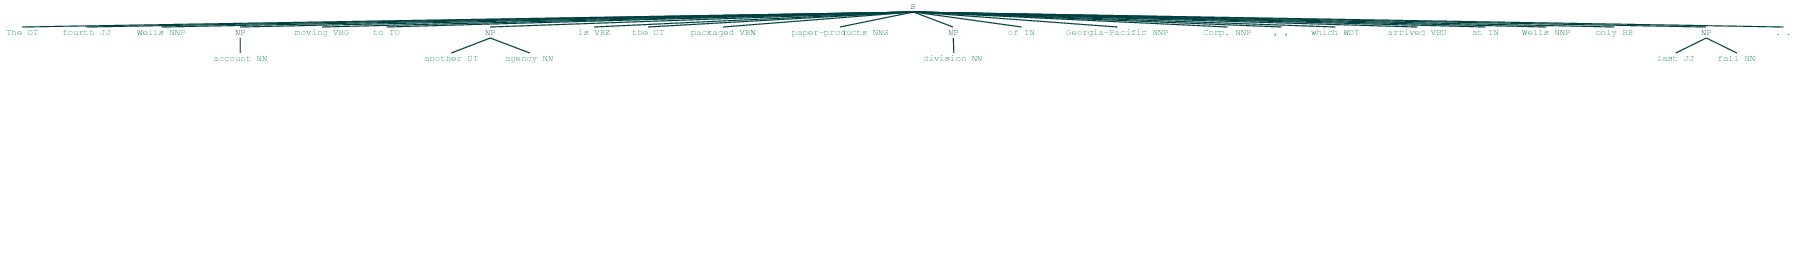

In [29]:
# For visualising inline 
# Use shorter sentences
import os
import nltk
from IPython.display import Image
nltk.draw.tree.TreeView(chunked[0])._cframe.print_to_file('output.ps')
os.system('convert output.ps output.png')

Image(filename='output.png')

In [33]:
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]
print(cp.parse(sentence))

(S
  Rapunzel/NNP
  let/VBD
  down/RP
  her/PP$
  (NP long/JJ golden/JJ hair/NN))


In [36]:
chunker = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
#importing textfile
brown = nltk.corpus.brown
for sent in brown.tagged_sents():
    tree = chunker.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK':
            print(subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK get/VB to/TO hear/VB)
(CHUNK expects/VBZ to/TO tell/VB)
(CHUNK expected/VBN to/TO give/VB)
(CHUNK prefer/VB to/TO pay/VB)
(CHUNK required/VBN to/TO obtain/VB)
(CHUNK permitted/VBN to/TO teach/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK Asked/VBN to/TO elaborate/VB)
(CHUNK got/VBN to/TO go/VB)
(CHUNK raised/VBN to/TO pay/VB)
(CHUNK scheduled/VBN to/TO go/VB)
(CHUNK cut/VBN to/TO meet/VB)
(CHUNK needed/VBN to/TO meet/VB)
(CHUNK hastened/VBD to/TO add/VB)
(CHUNK found/VBN to/TO prevent/VB)
(CHUNK continue/VB to/TO insist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK mad

(CHUNK hopes/VBZ to/TO visit/VB)
(CHUNK got/VBD to/TO see/VB)
(CHUNK arranged/VBD to/TO sell/VB)
(CHUNK delighted/VBN to/TO get/VB)
(CHUNK want/VB to/TO enjoy/VB)
(CHUNK tried/VBN to/TO get/VB)
(CHUNK try/VB to/TO close/VB)
(CHUNK required/VBN to/TO furnish/VB)
(CHUNK obliged/VBN to/TO dole/VB)
(CHUNK wished/VBD to/TO wait/VB)
(CHUNK decided/VBD to/TO act/VB)
(CHUNK hoped/VBN to/TO attend/VB)
(CHUNK like/VB to/TO woo/VB)
(CHUNK prepared/VBN to/TO discuss/VB)
(CHUNK wanted/VBD to/TO go/VB)
(CHUNK allowed/VBN to/TO file/VB)
(CHUNK tried/VBD to/TO persuade/VB)
(CHUNK began/VBD to/TO tell/VB)
(CHUNK hoped/VBD to/TO peddle/VB)
(CHUNK intended/VBN to/TO insure/VB)
(CHUNK decided/VBD to/TO provide/VB)
(CHUNK expected/VBN to/TO go/VB)
(CHUNK expected/VBN to/TO sign/VB)
(CHUNK like/VB to/TO eat/VB)
(CHUNK like/VB to/TO talk/VB)
(CHUNK ceased/VBN to/TO grumble/VB)
(CHUNK tending/VBG to/TO bid/VB)
(CHUNK start/VB to/TO pay/VB)
(CHUNK failed/VBN to/TO measure/VB)
(CHUNK going/VBG to/TO take/VB)
(C

(CHUNK continue/VB to/TO demonstrate/VB)
(CHUNK begins/VBZ to/TO wilt/VB)
(CHUNK going/VBG to/TO murder/VB)
(CHUNK trying/VBG to/TO puzzle/VB)
(CHUNK expects/VBZ to/TO profit/VB)
(CHUNK chooses/VBZ to/TO die/VB)
(CHUNK wishes/VBZ to/TO pay/VB)
(CHUNK conditioned/VBN to/TO expect/VB)
(CHUNK hoped/VBD to/TO tell/VB)
(CHUNK refusing/VBG to/TO make/VB)
(CHUNK intended/VBD to/TO stop/VB)
(CHUNK failed/VBD to/TO lead/VB)
(CHUNK need/VB to/TO discipline/VB)
(CHUNK attempts/VBZ to/TO trace/VB)
(CHUNK conspire/VB to/TO defy/VB)
(CHUNK learning/VBG to/TO think/VB)
(CHUNK wants/VBZ to/TO know/VB)
(CHUNK wants/VBZ to/TO supply/VB)
(CHUNK begin/VB to/TO look/VB)
(CHUNK start/VB to/TO think/VB)
(CHUNK attempt/VB to/TO say/VB)
(CHUNK come/VBN to/TO feel/VB)
(CHUNK supposed/VBN to/TO put/VB)
(CHUNK called/VBN to/TO work/VB)
(CHUNK continue/VB to/TO exist/VB)
(CHUNK observed/VBN to/TO characterize/VB)
(CHUNK continue/VB to/TO alienate/VB)
(CHUNK continue/VB to/TO preach/VB)
(CHUNK means/VBZ to/TO say/V

(CHUNK promises/VBZ to/TO open/VB)
(CHUNK selected/VBN to/TO operate/VB)
(CHUNK used/VBN to/TO measure/VB)
(CHUNK employed/VBN to/TO measure/VB)
(CHUNK used/VBN to/TO detect/VB)
(CHUNK tend/VB to/TO reflect/VB)
(CHUNK used/VBN to/TO scan/VB)
(CHUNK decided/VBD to/TO enter/VB)
(CHUNK preparing/VBG to/TO matriculate/VB)
(CHUNK continued/VBD to/TO help/VB)
(CHUNK intend/VB to/TO carry/VB)
(CHUNK lived/VBD to/TO see/VB)
(CHUNK manage/VB to/TO experiment/VB)
(CHUNK tempted/VBN to/TO compare/VB)
(CHUNK made/VBN to/TO see/VB)
(CHUNK caused/VBN to/TO glow/VB)
(CHUNK made/VBN to/TO flow/VB)
(CHUNK happened/VBD to/TO place/VB)
(CHUNK used/VBN to/TO construct/VB)
(CHUNK used/VBN to/TO fill/VB)
(CHUNK examine/VB to/TO make/VB)
(CHUNK designed/VBN to/TO counter/VB)
(CHUNK tend/VB to/TO become/VB)
(CHUNK try/VB to/TO share/VB)
(CHUNK continue/VB to/TO make/VB)
(CHUNK come/VBN to/TO expect/VB)
(CHUNK used/VBN to/TO keep/VB)
(CHUNK bound/VBN to/TO increase/VB)
(CHUNK trying/VBG to/TO match/VB)
(CHUNK 

(CHUNK began/VBD to/TO pull/VB)
(CHUNK began/VBD to/TO draw/VB)
(CHUNK like/VB to/TO go/VB)
(CHUNK tend/VB to/TO compete/VB)
(CHUNK doing/VBG to/TO help/VB)
(CHUNK begins/VBZ to/TO see/VB)
(CHUNK Desiring/VBG to/TO fill/VB)
(CHUNK tends/VBZ to/TO look/VB)
(CHUNK try/VB to/TO match/VB)
(CHUNK played/VBN to/TO win/VB)
(CHUNK failed/VBD to/TO make/VB)
(CHUNK began/VBD to/TO involve/VB)
(CHUNK learning/VBG to/TO bunt/VB)
(CHUNK dared/VBD to/TO dream/VB)
(CHUNK dared/VBD to/TO taunt/VB)
(CHUNK refused/VBD to/TO come/VB)
(CHUNK undertook/VBD to/TO set/VB)
(CHUNK essayed/VBD to/TO down/VB)
(CHUNK began/VBD to/TO prosper/VB)
(CHUNK liked/VBD to/TO wring/VB)
(CHUNK happened/VBD to/TO sit/VB)
(CHUNK hastened/VBN to/TO place/VB)
(CHUNK began/VBD to/TO offer/VB)
(CHUNK seemed/VBD to/TO indicate/VB)
(CHUNK liked/VBD to/TO imagine/VB)
(CHUNK expected/VBN to/TO know/VB)
(CHUNK began/VBD to/TO appear/VB)
(CHUNK begin/VB to/TO store/VB)
(CHUNK continue/VB to/TO sanction/VB)
(CHUNK intended/VBN to/TO de

(CHUNK expected/VBN to/TO move/VB)
(CHUNK means/VBZ to/TO ridicule/VB)
(CHUNK hesitate/VB to/TO sacrifice/VB)
(CHUNK forced/VBN to/TO move/VB)
(CHUNK taken/VBN to/TO effect/VB)
(CHUNK hoped/VBD to/TO imprint/VB)
(CHUNK tailored/VBN to/TO fit/VB)
(CHUNK obliged/VBN to/TO describe/VB)
(CHUNK tried/VBD to/TO block/VB)
(CHUNK chosen/VBN to/TO edit/VB)
(CHUNK plotted/VBD to/TO take/VB)
(CHUNK tried/VBD to/TO halt/VB)
(CHUNK wanted/VBD to/TO die/VB)
(CHUNK returned/VBD to/TO make/VB)
(CHUNK like/VB to/TO believe/VB)
(CHUNK bother/VB to/TO look/VB)
(CHUNK used/VBD to/TO go/VB)
(CHUNK seemed/VBD to/TO thaw/VB)
(CHUNK came/VBD to/TO give/VB)
(CHUNK wanted/VBD to/TO see/VB)
(CHUNK used/VBD to/TO look/VB)
(CHUNK meant/VBN to/TO help/VB)
(CHUNK like/VB to/TO straighten/VB)
(CHUNK hope/VB to/TO give/VB)
(CHUNK bark/VB to/TO let/VB)
(CHUNK dash/VB to/TO get/VB)
(CHUNK tried/VBD to/TO talk/VB)
(CHUNK decided/VBD to/TO leave/VB)
(CHUNK used/VBD to/TO tell/VB)
(CHUNK continue/VB to/TO reflect/VB)
(CHUN

(CHUNK construed/VBN to/TO limit/VB)
(CHUNK directed/VBN to/TO pay/VB)
(CHUNK directed/VBN to/TO cover/VB)
(CHUNK failed/VBN to/TO offer/VB)
(CHUNK intends/VBZ to/TO pursue/VB)
(CHUNK helping/VBG to/TO create/VB)
(CHUNK wish/VB to/TO merge/VB)
(CHUNK pleased/VBN to/TO note/VB)
(CHUNK continue/VB to/TO serve/VB)
(CHUNK pleased/VBN to/TO note/VB)
(CHUNK inclined/VBN to/TO drag/VB)
(CHUNK trying/VBG to/TO get/VB)
(CHUNK made/VBN to/TO enlist/VB)
(CHUNK try/VB to/TO run/VB)
(CHUNK designed/VBN to/TO help/VB)
(CHUNK designed/VBN to/TO reflect/VB)
(CHUNK designed/VBN to/TO avoid/VB)
(CHUNK designed/VBN to/TO reflect/VB)
(CHUNK required/VBN to/TO help/VB)
(CHUNK working/VBG to/TO develop/VB)
(CHUNK installed/VBN to/TO increase/VB)
(CHUNK prepared/VBN to/TO stay/VB)
(CHUNK used/VBN to/TO keep/VB)
(CHUNK came/VBD to/TO receive/VB)
(CHUNK tend/VB to/TO create/VB)
(CHUNK attempting/VBG to/TO bring/VB)
(CHUNK designed/VBN to/TO arrest/VB)
(CHUNK attempt/VB to/TO monopolize/VB)
(CHUNK held/VBN to/T

(CHUNK used/VBN to/TO accomplish/VB)
(CHUNK found/VBN to/TO match/VB)
(CHUNK required/VBN to/TO store/VB)
(CHUNK saved/VBN to/TO represent/VB)
(CHUNK saved/VBN to/TO represent/VB)
(CHUNK created/VBN to/TO accommodate/VB)
(CHUNK inspected/VBN to/TO determine/VB)
(CHUNK used/VBN to/TO look/VB)
(CHUNK serve/VB to/TO illustrate/VB)
(CHUNK intended/VBN to/TO decrease/VB)
(CHUNK required/VBN to/TO improve/VB)
(CHUNK italicized/VBN to/TO guide/VB)
(CHUNK seems/VBZ to/TO center/VB)
(CHUNK operate/VB to/TO center/VB)
(CHUNK serves/VBZ to/TO focus/VB)
(CHUNK purport/VB to/TO represent/VB)
(CHUNK hesitates/VBZ to/TO suggest/VB)
(CHUNK mentioned/VBN to/TO make/VB)
(CHUNK trying/VBG to/TO develop/VB)
(CHUNK compelled/VBN to/TO omit/VB)
(CHUNK continue/VB to/TO show/VB)
(CHUNK planning/VBG to/TO use/VB)
(CHUNK expecting/VBG to/TO recover/VB)
(CHUNK meant/VBD to/TO move/VB)
(CHUNK preferred/VBD to/TO continue/VB)
(CHUNK trying/VBG to/TO find/VB)
(CHUNK planned/VBN to/TO exterminate/VB)
(CHUNK trying/

(CHUNK hoping/VBG to/TO store/VB)
(CHUNK going/VBG to/TO get/VB)
(CHUNK want/VB to/TO get/VB)
(CHUNK trying/VBG to/TO talk/VB)
(CHUNK determined/VBD to/TO go/VB)
(CHUNK proposed/VBN to/TO rebuild/VB)
(CHUNK going/VBG to/TO stay/VB)
(CHUNK plan/VB to/TO repair/VB)
(CHUNK Hope/VB to/TO see/VB)
(CHUNK used/VBD to/TO take/VB)
(CHUNK want/VB to/TO kill/VB)
(CHUNK intend/VB to/TO go/VB)
(CHUNK wanted/VBN to/TO hurt/VB)
(CHUNK bother/VB to/TO think/VB)
(CHUNK delighted/VBN to/TO see/VB)
(CHUNK began/VBD to/TO weep/VB)
(CHUNK began/VBD to/TO move/VB)
(CHUNK tried/VBD to/TO push/VB)
(CHUNK tried/VBD to/TO rescue/VB)
(CHUNK seemed/VBD to/TO hold/VB)
(CHUNK began/VBD to/TO think/VB)
(CHUNK strove/VBD to/TO think/VB)
(CHUNK run/VB to/TO tell/VB)
(CHUNK fail/VB to/TO hear/VB)
(CHUNK dared/VBD to/TO wait/VB)
(CHUNK dared/VBD to/TO pat/VB)
(CHUNK trying/VBG to/TO push/VB)
(CHUNK began/VBD to/TO whirl/VB)
(CHUNK started/VBD to/TO worry/VB)
(CHUNK tried/VBD to/TO push/VB)
(CHUNK wanted/VBD to/TO get/VB

(CHUNK used/VBD to/TO paint/VB)
(CHUNK Begin/VB to/TO look/VB)
(CHUNK wanted/VBD to/TO see/VB)
(CHUNK Failing/VBG to/TO find/VB)
(CHUNK Try/VB to/TO forget/VB)
(CHUNK seen/VBN to/TO leave/VB)
(CHUNK forced/VBN to/TO give/VB)
(CHUNK inclined/VBN to/TO admit/VB)
(CHUNK began/VBD to/TO make/VB)
(CHUNK professed/VBD to/TO know/VB)
(CHUNK asked/VBD to/TO use/VB)
(CHUNK leaving/VBG to/TO keep/VB)
(CHUNK fit/VBN to/TO consult/VB)
(CHUNK asked/VBD to/TO see/VB)
(CHUNK wanted/VBD to/TO make/VB)
(CHUNK continued/VBD to/TO discharge/VB)
(CHUNK seem/VB to/TO belong/VB)
(CHUNK began/VBD to/TO flicker/VB)
(CHUNK trying/VBG to/TO wreck/VB)
(CHUNK fit/VBN to/TO touch/VB)
(CHUNK going/VBG to/TO take/VB)
(CHUNK trying/VBG to/TO clear/VB)
(CHUNK want/VB to/TO spend/VB)
(CHUNK paused/VBD to/TO look/VB)
(CHUNK going/VBG to/TO allow/VB)
(CHUNK like/VB to/TO talk/VB)
(CHUNK planning/VBG to/TO set/VB)
(CHUNK bent/VBD to/TO examine/VB)
(CHUNK turned/VBD to/TO jump/VB)
(CHUNK started/VBD to/TO retch/VB)
(CHUNK 

(CHUNK going/VBG to/TO keel/VB)
(CHUNK seemed/VBD to/TO enjoy/VB)
(CHUNK like/VB to/TO know/VB)
(CHUNK deserve/VB to/TO lie/VB)
(CHUNK want/VB to/TO see/VB)
(CHUNK pretending/VBG to/TO joke/VB)
(CHUNK used/VBD to/TO try/VB)
(CHUNK trying/VBG to/TO look/VB)
(CHUNK began/VBD to/TO watch/VB)
(CHUNK want/VB to/TO go/VB)
(CHUNK seemed/VBD to/TO sink/VB)
(CHUNK began/VBD to/TO ooze/VB)
(CHUNK began/VBD to/TO move/VB)
(CHUNK seemed/VBD to/TO know/VB)
(CHUNK trying/VBG to/TO talk/VB)
(CHUNK continued/VBD to/TO lash/VB)
(CHUNK turned/VBD to/TO look/VB)
(CHUNK struggled/VBD to/TO control/VB)
(CHUNK deserved/VBD to/TO live/VB)
(CHUNK like/VB to/TO hunt/VB)
(CHUNK left/VBN to/TO say/VB)
(CHUNK like/VB to/TO recognize/VB)
(CHUNK wanting/VBG to/TO fly/VB)
(CHUNK dispatched/VBN to/TO harry/VB)
(CHUNK started/VBD to/TO buckle/VB)
(CHUNK began/VBD to/TO crawl/VB)
(CHUNK wanted/VBD to/TO lose/VB)
(CHUNK going/VBG to/TO show/VB)
(CHUNK going/VBG to/TO give/VB)
(CHUNK trying/VBG to/TO size/VB)
(CHUNK seem

(CHUNK trouble/VB to/TO memorize/VB)
(CHUNK deigned/VBD to/TO appear/VB)
(CHUNK seemed/VBD to/TO understand/VB)
(CHUNK try/VB to/TO revive/VB)
(CHUNK seemed/VBD to/TO produce/VB)
(CHUNK returning/VBG to/TO jump/VB)
(CHUNK tried/VBD to/TO farm/VB)
(CHUNK going/VBG to/TO set/VB)
(CHUNK turned/VBD to/TO stare/VB)
(CHUNK seem/VB to/TO think/VB)
(CHUNK liked/VBD to/TO hire/VB)
(CHUNK remember/VB to/TO telephone/VB)
(CHUNK like/VB to/TO work/VB)
(CHUNK like/VB to/TO disclose/VB)
(CHUNK got/VBD to/TO put/VB)
(CHUNK got/VBN to/TO run/VB)
(CHUNK waiting/VBG to/TO get/VB)
(CHUNK need/VB to/TO worry/VB)
(CHUNK seems/VBZ to/TO think/VB)
(CHUNK tries/VBZ to/TO baffle/VB)
(CHUNK mean/VB to/TO reconsider/VB)
(CHUNK refused/VBD to/TO make/VB)
(CHUNK seems/VBZ to/TO make/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK seems/VBZ to/TO say/VB)
(CHUNK delighted/VBN to/TO meet/VB)
(CHUNK like/VB to/TO know/VB)
(CHUNK regret/VB to/TO say/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK come/VBN to/TO talk/VB)
(CHUNK

In [52]:
class ConsecutiveNPChunkTagger(nltk.TaggerI):

    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train(
            train_set, algorithm='tadm', trace=0)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

class ConsecutiveNPChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

In [53]:
def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    return{"pos":pos}

chunker = ConsecutiveNPChunker(brown.tagged_sents())
print(chunker.evaluate(test_sents))

LookupError: 

===========================================================================
NLTK was unable to find the tadm file!
Use software specific configuration paramaters or set the TADM environment variable.

  For more information on tadm, see:
    <http://tadm.sf.net>
===========================================================================